In [1]:
import os, sys
import numpy as np
base_path = "/s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition"
base_path

'/s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition'

In [2]:
uci_har_dataset_path = f'{base_path}/data/UCI_HAR'
uci_har_dataset_path

'/s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/data/UCI_HAR'

In [3]:
if base_path not in sys.path:
    sys.path.append(base_path) 

In [4]:
import src.load_uci_har_dataset as uci_har

In [5]:
Xtrain, ytrain, xtest, ytest, labels = uci_har.load_uci_har_dir(uci_har_dataset_path)

In [6]:
Xtrain.shape, ytrain.shape, xtest.shape, ytest.shape, labels,len(labels)

((7352, 128, 6),
 (7352,),
 (2947, 128, 6),
 (2947,),
 ['WALKING',
  'WALKING_UPSTAIRS',
  'WALKING_DOWNSTAIRS',
  'SITTING',
  'STANDING',
  'LAYING'],
 6)

In [152]:
import importlib
importlib.reload(models)

<module 'src.get_models' from '/s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/src/get_models.py'>

In [8]:
!pip install tensorflow-model-optimization

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [153]:
import src.get_models as models

In [154]:
input_shape = Xtrain.shape[1:]
num_classes = len(labels)
input_shape, num_classes

((128, 6), 6)

In [155]:
gru_model = models.get_GRU_model(input_shape, num_classes)

2025-12-15 17:01:10.466123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:01:10.466972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:01:10.467544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [156]:
gru_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 6)]          0         
                                                                 
 gru_9 (GRU)                 (None, 128, 64)           13824     
                                                                 
 gru_10 (GRU)                (None, 32)                9408      
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                           

In [157]:
import keras

In [158]:
gru_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [159]:
epochs, batch_size = 150, 64

In [179]:
lr_decay_callback = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
                                      patience=8, min_lr=1e-6, verbose=1),
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)

In [180]:
gru_model_history = gru_model.fit(Xtrain, ytrain, epochs=epochs, batch_size=batch_size,
                          validation_split=0.1, verbose=1, callbacks=[early_stop, lr_decay_callback])

Epoch 1/150
104/104 [==============================] - 5s 50ms/step - loss: 0.1741 - accuracy: 0.9397 - val_loss: 0.2205 - val_accuracy: 0.9171 - lr: 1.2500e-04
Epoch 2/150
104/104 [==============================] - 5s 51ms/step - loss: 0.1645 - accuracy: 0.9404 - val_loss: 0.2406 - val_accuracy: 0.8954 - lr: 1.2500e-04
Epoch 3/150
104/104 [==============================] - 5s 50ms/step - loss: 0.1541 - accuracy: 0.9417 - val_loss: 0.2472 - val_accuracy: 0.9035 - lr: 1.2500e-04
Epoch 4/150
104/104 [==============================] - 5s 50ms/step - loss: 0.1508 - accuracy: 0.9439 - val_loss: 0.2354 - val_accuracy: 0.9076 - lr: 1.2500e-04
Epoch 5/150
104/104 [==============================] - 5s 50ms/step - loss: 0.1490 - accuracy: 0.9407 - val_loss: 0.2519 - val_accuracy: 0.8913 - lr: 1.2500e-04
Epoch 6/150
104/104 [==============================] - 5s 50ms/step - loss: 0.1497 - accuracy: 0.9417 - val_loss: 0.2148 - val_accuracy: 0.9130 - lr: 1.2500e-04
Epoch 7/150
104/104 [=============

In [181]:
gru_model_history.history['val_accuracy']

[0.917119562625885,
 0.895380437374115,
 0.9035326242446899,
 0.907608687877655,
 0.8913043737411499,
 0.9130434989929199,
 0.9021739363670349,
 0.9116848111152649,
 0.9130434989929199,
 0.904891312122345,
 0.895380437374115,
 0.9239130616188049,
 0.9239130616188049,
 0.914402186870575,
 0.9035326242446899,
 0.9211956262588501,
 0.8926630616188049,
 0.8817934989929199,
 0.9116848111152649,
 0.907608687877655,
 0.898097813129425,
 0.9239130616188049,
 0.89402174949646,
 0.90625,
 0.89673912525177,
 0.9021739363670349,
 0.914402186870575,
 0.914402186870575,
 0.8926630616188049,
 0.898097813129425,
 0.904891312122345,
 0.9035326242446899,
 0.904891312122345,
 0.9021739363670349,
 0.89673912525177,
 0.917119562625885,
 0.9089673757553101,
 0.895380437374115,
 0.9035326242446899,
 0.9103260636329651,
 0.9035326242446899,
 0.9089673757553101]

In [182]:
gru_model_loss, gru_model_accuracy = gru_model.evaluate(
    xtest, ytest)

93/93 [==============================] - 1s 13ms/step - loss: 0.3158 - accuracy: 0.9165


In [183]:
gru_model_accuracy, gru_model_loss

(0.9165253043174744, 0.3158060610294342)

In [184]:
import matplotlib.pyplot as plt

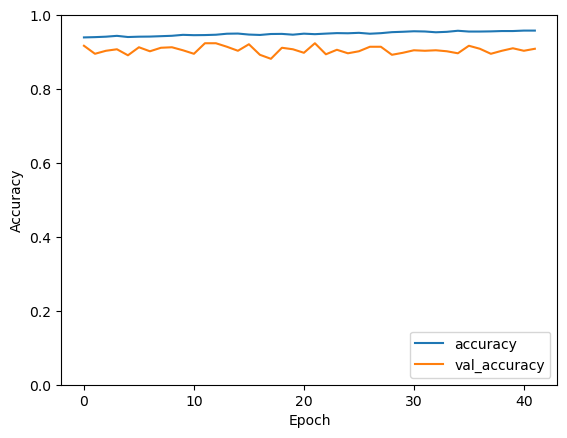

In [185]:
plt.plot(gru_model_history.history['accuracy'], label='accuracy')
plt.plot(gru_model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [186]:
gru_model_predict = gru_model.predict(xtest)
gru_model_predict

93/93 [==============================] - 1s 13ms/step


array([[1.6246463e-07, 2.1439178e-07, 3.1070335e-09, 1.0492313e-02,
        2.3330854e-01, 7.5619876e-01],
       [3.8860489e-06, 1.5339414e-07, 7.5310616e-08, 3.5301183e-04,
        9.9916577e-01, 4.7708393e-04],
       [7.0055692e-05, 1.3478499e-06, 1.0533056e-06, 2.1346319e-04,
        9.9760473e-01, 2.1093213e-03],
       ...,
       [9.7417644e-05, 9.9950743e-01, 3.9483918e-04, 1.0873439e-07,
        6.8390477e-08, 1.6061385e-07],
       [1.1834568e-08, 1.0000000e+00, 1.8086807e-08, 1.8477198e-08,
        1.0693858e-09, 6.6457106e-09],
       [5.4199996e-09, 9.9999857e-01, 1.1336039e-06, 2.4282039e-08,
        3.9722594e-09, 2.1667006e-07]], dtype=float32)

In [187]:
y_pred = gru_model_predict.argmax(axis=1)                                     

y_pred_labels = [labels[i] for i in y_pred]
y_pred, y_pred_labels

(array([5, 4, 4, ..., 1, 1, 1]),
 ['LAYING',
  'STANDING',
  'STANDING',
  'LAYING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'SITTING',
  'LAYING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'LAYING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'STANDING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'SITTING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'SITTING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
  'LAYING',
 

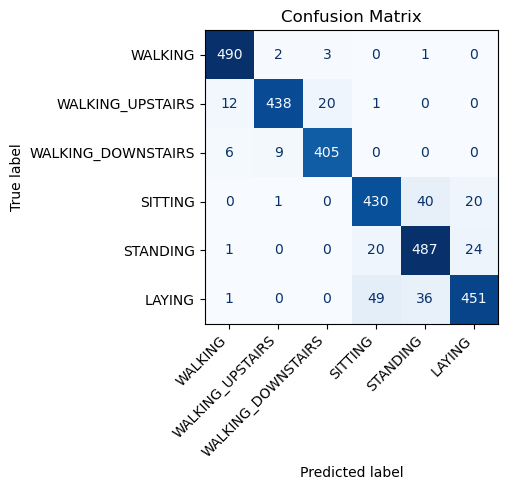

In [188]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(ytest, y_pred, labels=range(len(labels)))  # raw counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format="d")
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [189]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=labels))


                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.93      0.95       471
WALKING_DOWNSTAIRS       0.95      0.96      0.96       420
           SITTING       0.86      0.88      0.87       491
          STANDING       0.86      0.92      0.89       532
            LAYING       0.91      0.84      0.87       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [190]:
gru_model.save(f'{base_path}/models/gru_model.keras')

In [191]:
import tensorflow as tf
run_model = tf.function(lambda x: gru_model(x))
BATCH_SIZE = 1
STEPS = 128
INPUT_SIZE = 6
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], gru_model.inputs[0].dtype))

# model directory.
MODEL_DIR = f"{base_path}/GRU"
gru_model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

2025-12-15 17:21:00.658236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:00.659055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:00.659597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:01.425010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:01.425790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:01.426299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:02.300276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:02.301411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:02.302129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:02.805653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:02.806487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:02.806998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: /s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/GRU/assets


INFO:tensorflow:Assets written to: /s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/GRU/assets


In [192]:
import tensorflow as tf
run_model = tf.function(lambda x: gru_model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 128
INPUT_SIZE = 6
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], gru_model.inputs[0].dtype))

# model directory.
MODEL_DIR = f"{base_path}/models"
gru_model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

2025-12-15 17:21:03.566978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:03.567830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:03.568336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:04.163354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:04.164092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:04.164617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:04.663093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128,6]
	 [[{{node inputs}}]]
2025-12-15 17:21:04.675177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128,6]
	 [[{{node inputs}}]]
2025-12-15 17:21:04.747288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node 

2025-12-15 17:21:05.239192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-12-15 17:21:05.239979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-12-15 17:21:05.240482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: /s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/models/assets


INFO:tensorflow:Assets written to: /s/chopin/k/grad/C837304112/Documents/ESML/final_project/human_activity_recognition/models/assets


In [193]:
float_gru_model = models.get_float_model(MODEL_DIR, f'{base_path}/models/float_gru.tflite')

2025-12-15 17:21:06.564372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2025-12-15 17:21:06.564454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2025-12-15 17:21:06.564490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:06.807213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2025-12-15 17:21:06.807285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2025-12-15 17:21:06.807318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025-12-15 17:21:07.287376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2025-12-15 17:21:07.287460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2025-12-15 17:21:07.287494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [194]:
def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  prediction_digits = []
  for i, test_image in enumerate(xtest):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)
#     true_labels = np.argmax(ytest, axis=1)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == ytest).mean()
  return accuracy

In [195]:
import tensorflow as tf

interpreter_gru_tflite = tf.lite.Interpreter(model_path=f"{base_path}/models/float_gru.tflite")
interpreter_gru_tflite.allocate_tensors()

test_accuracy_gru_tflite = evaluate_model(interpreter_gru_tflite)
print("float model accuracy", test_accuracy_gru_tflite)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.


float model accuracy 0.9165252799457075


In [196]:
print("GRU Float model size in MB:", os.path.getsize(f"{base_path}/models/float_gru.tflite") / float(2**20))

GRU Float model size in MB: 0.15530776977539062
